In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import Image
import statistics

In [2]:
HOUSING_PATH = "housing.csv"

housing = pd.read_csv(HOUSING_PATH)

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


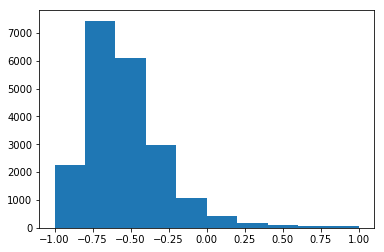

In [10]:
# 1.Масштабирование: а. Нормализовать признак - median_income б. Привести признак - population к масштабу от 0 до 100

from sklearn import preprocessing

Median_income_base = housing['median_income']

Median_income_1 = Median_income_base - statistics.mean(Median_income_base)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Median_income_norm = min_max_scaler.fit_transform(np.array(Median_income_1).reshape(-1, 1))

plt.hist(Median_income_norm)
plt.show()



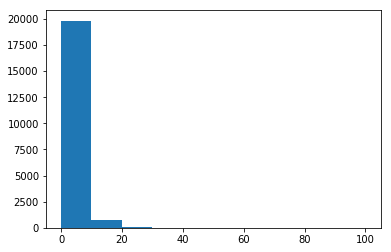

In [16]:
M = housing['population'].max()

Population_100 = housing['population']*(100/M)

plt.hist(Population_100)
plt.show()

In [18]:
print(Population_100.min(), ' - ', Population_100.max())

0.008407600470825626  -  100.0


In [26]:
# 2.Заполнение пропусков: 
# а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца 
# ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, 
#нужно заполнить его средним значением по этой категории

import math

s = []

for index, row in housing.iterrows(): 
    if math.isnan(row['total_bedrooms']): s.append(index)

print('Значение total_bedrooms = NanN у', len(s),' строк')


Значение total_bedrooms = NanN у 207  строк


In [58]:

for index, row in housing.iterrows(): 
    if math.isnan(row['total_bedrooms']):
        housing.set_value(index, 'total_bedrooms',  housing[housing['ocean_proximity']==row['ocean_proximity']]['total_bedrooms'].mean())
        
s = []
        
for index, row in housing.iterrows(): 
    if math.isnan(row['total_bedrooms']): s.append(index)

print('Значение total_bedrooms = NanN у', len(s),' строк')


Значение total_bedrooms = NanN у 0  строк


In [47]:
# 3.Категорийные атрибуты: 
# а. Посчитать среднее кол-во комнат в строке (total_rooms/households) 
# б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
housing['rooms_number'] = housing['total_rooms']// housing['households']
 
rooms = pd.unique(housing[['rooms_number']].values.ravel('K'))

rooms
## Если поавильно понял задание,  нужно каждой строке присвоить некую категорию исходя из значения 
## total_rooms/households

array([  6.,   8.,   5.,   4.,   3.,   2.,   7.,   1.,   9.,  10.,  29.,
        31.,  16.,  28.,  13.,  11.,  33.,  47.,  22.,  23.,  38.,  20.,
        15.,  56.,  61., 141.,  37.,  34., 132.,  26.,  50.,  24.,  21.,
        19.,  17.,   0.,  14.,  12.,  52.,  18.,  36.,  41.,  39.,  59.,
        62.])

In [67]:
for index, row in housing.iterrows(): 
    if row['rooms_number'] <= 20: housing.set_value(index, 'rooms_category','Small')
    if (row['rooms_number'] > 20) & (row['rooms_number'] < 60) : 
        housing.set_value(index, 'rooms_category','Medium')
    if row['rooms_number'] >= 60: housing.set_value(index, 'rooms_category','Big')    
        
housing.head(20)

C:\Users\yaschenko-vv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\yaschenko-vv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\yaschenko-vv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_number,rooms_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0,Small
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0,Small
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.0,Small
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.0,Small
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.0,Small
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.0,Small
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.0,Small
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.0,Small
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.0,Small
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.0,Small
